In [13]:
import pandas as pd

df = pd.read_csv("/content/drive/MyDrive/DS 2025/futuristic_city_traffic.csv")
df.head()


,City,Vehicle Type,Weather,Economic Condition,Day Of Week,Hour Of Day,Speed,Is Peak Hour,Random Event Occurred,Energy Consumption,Traffic Density
0,SolarisVille,Drone,Snowy,Stable,Sunday,20,29.4268,0,0,14.7134,0.5241
1,AquaCity,Flying Car,Solar Flare,Recession,Wednesday,2,118.8000,0,0,143.5682,0.3208
2,Neuroburg,Autonomous Vehicle,Solar Flare,Recession,Wednesday,16,100.3904,0,0,91.2640,0.0415
3,Ecoopolis,Drone,Clear,Booming,Thursday,8,76.8000,1,0,46.0753,0.1811
4,AquaCity,Autonomous Vehicle,Solar Flare,Stable,Saturday,16,45.2176,0,0,40.1934,0.4544


In [14]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1219567 entries, 0 to 1219566
Data columns (total 11 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   City                   1219567 non-null  object 
 1   Vehicle Type           1219567 non-null  object 
 2   Weather                1219567 non-null  object 
 3   Economic Condition     1219567 non-null  object 
 4   Day Of Week            1219567 non-null  object 
 5   Hour Of Day            1219567 non-null  int64  
 6   Speed                  1219567 non-null  float64
 7   Is Peak Hour           1219567 non-null  int64  
 8   Random Event Occurred  1219567 non-null  int64  
 9   Energy Consumption     1219567 non-null  float64
 10  Traffic Density        1219567 non-null  float64
dtypes: float64(3), int64(3), object(5)
memory usage: 102.4+ MB


In [15]:
df.describe(include="all")


,City,Vehicle Type,Weather,Economic Condition,Day Of Week,Hour Of Day,Speed,Is Peak Hour,Random Event Occurred,Energy Consumption,Traffic Density
count,1219567,1219567,1219567,1219567,1219567,1.219567e+06,1.219567e+06,1.219567e+06,1.219567e+06,1.219567e+06,1.219567e+06
unique,6,4,5,3,7,NaN,NaN,NaN,NaN,NaN,NaN
top,Ecoopolis,Autonomous Vehicle,Solar Flare,Booming,Tuesday,NaN,NaN,NaN,NaN,NaN,NaN
freq,204179,757454,244237,406684,174783,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,1.150817e+01,5.994476e+01,1.546992e-01,4.988738e-02,4.946464e+01,2.770960e-01
std,NaN,NaN,NaN,NaN,NaN,6.919071e+00,2.663203e+01,3.616178e-01,2.177123e-01,2.528014e+01,2.191019e-01
min,NaN,NaN,NaN,NaN,NaN,0.000000e+00,6.693400e+00,0.000000e+00,0.000000e+00,4.929600e+00,5.900000e-03
25%,NaN,NaN,NaN,NaN,NaN,6.000000e+00,3.753310e+01,0.000000e+00,0.000000e+00,2.927395e+01,1.059000e-01
50%,NaN,NaN,NaN,NaN,NaN,1.200000e+01,5.847110e+01,0.000000e+00,0.000000e+00,4.578260e+01,2.186000e-01
75%,NaN,NaN,NaN,NaN,NaN,1.700000e+01,8.053455e+01,0.000000e+00,0.000000e+00,6.590550e+01,3.960000e-01


In [16]:
df.isnull().sum()


,0
City,0
Vehicle Type,0
Weather,0
Economic Condition,0
Day Of Week,0
Hour Of Day,0
Speed,0
Is Peak Hour,0
Random Event Occurred,0
Energy Consumption,0


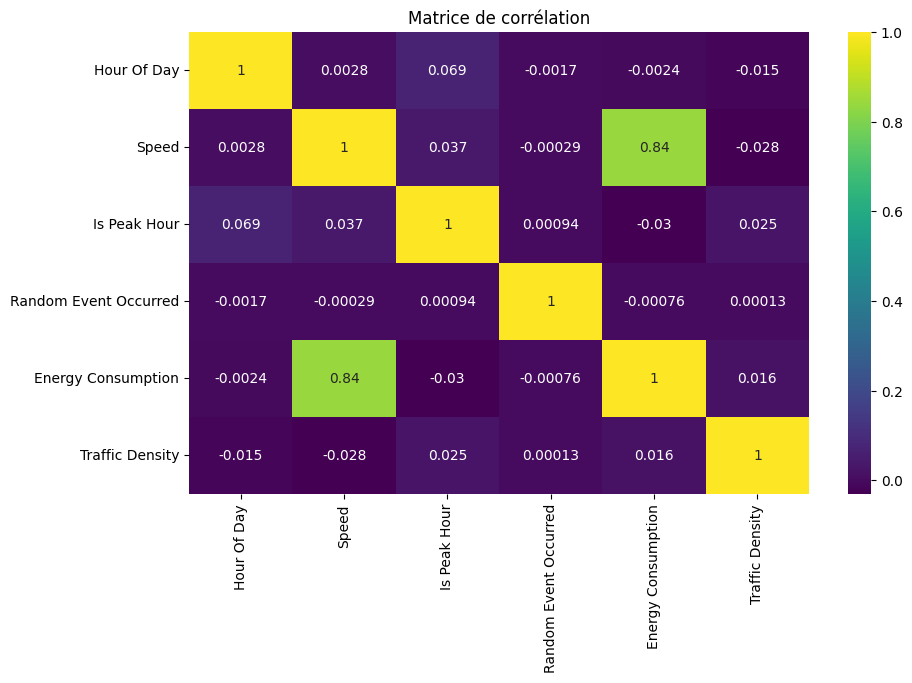

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
# Select only numeric columns for correlation calculation
sns.heatmap(df.select_dtypes(include=['number']).corr(), annot=True, cmap="viridis")
plt.title("Matrice de corrélation")
plt.show()

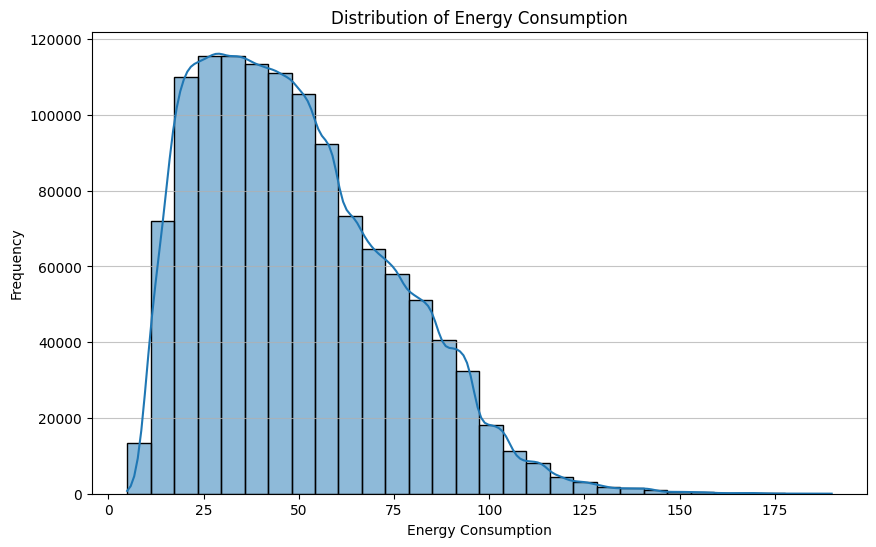

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.histplot(df['Energy Consumption'], kde=True, bins=30)
plt.title('Distribution of Energy Consumption')
plt.xlabel('Energy Consumption')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)
plt.show()

In [26]:
from sklearn.model_selection import train_test_split

# Définition des features et de la cible
X = df.drop("Traffic Density", axis=1)
y = df["Traffic Density"]

# Découpage train/test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [28]:
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import numpy as np # Import numpy for sqrt

# ------------------------------
# 1. Séparer X et y
# ------------------------------
X = df.drop("Traffic Density", axis=1)
y = df["Traffic Density"]

# ------------------------------
# 2. Identifier colonnes catégorielles
# ------------------------------
cat_cols = X.select_dtypes(include=['object']).columns
num_cols = X.select_dtypes(include=['int64','float64']).columns

# ------------------------------
# 3. Preprocessing : OneHotEncoder + pass-through
# ------------------------------
preprocessor = ColumnTransformer(
    transformers=[
        ("cat", OneHotEncoder(handle_unknown='ignore'), cat_cols),
        ("num", "passthrough", num_cols)
    ]
)

# ------------------------------
# 4. Pipeline complet
# ------------------------------
pipeline = Pipeline([
    ("preprocessing", preprocessor),
    ("model", LinearRegression())
])

# ------------------------------
# 5. Train/Test split
# ------------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# ------------------------------
# 6. Entraînement
# ------------------------------
pipeline.fit(X_train, y_train)

# ------------------------------
# 7. Prédiction et RMSE
# ------------------------------
y_pred = pipeline.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

rmse

np.float64(0.1284549448194087)

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


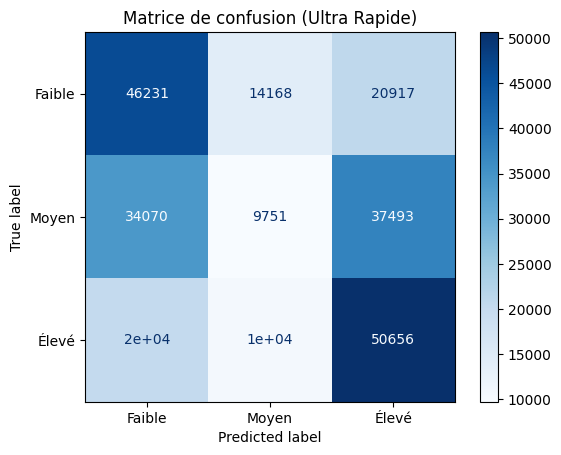

In [44]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# ------ 1) Créer la variable cible 3 classes ------
df['Traffic_Class'] = pd.qcut(df['Traffic Density'], q=3, labels=[0,1,2])

# ------ 2) Encoder toutes les colonnes catégorielles (super rapide) ------
df_encoded = df.copy()
le = LabelEncoder()

for col in df_encoded.columns:
    if df_encoded[col].dtype == 'object':
        df_encoded[col] = le.fit_transform(df_encoded[col])

# ------ 3) Séparation X / y ------
X = df_encoded.drop(["Traffic Density", "Traffic_Class"], axis=1)
y = df_encoded["Traffic_Class"]

# ------ 4) Train-test split ------
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# ------ 5) Modèle ultra rapide ------
model = LogisticRegression(max_iter=200)
model.fit(X_train, y_train)

# ------ 6) Prédiction & Matrice de confusion ------
y_pred = model.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(
    confusion_matrix=cm,
    display_labels=["Faible", "Moyen", "Élevé"]
)

disp.plot(cmap="Blues")
plt.title("Matrice de confusion (Ultra Rapide)")
plt.show()
